In [1]:
%pylab
%matplotlib inline
rc('text', usetex = False)
import pandas as pd
import cosmoslik as cs

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_data():
    '''
    Grabs the cepheids and sne from the R16 sample
    returns: 
        cepheids: Cepheid dataframe
        sne: sne dataframe
    '''
    filename = '../data/r16_table4.out'
    sne_start = 40
    sne_end = 59
    sne_lines = arange(sne_start,sne_end)
    sne = pd.DataFrame(columns = ['Host', 'sne', 'm^B_0', 'err'], index = arange(sne_end - sne_start))
    ceph_start = 70
    ceph_end = 2346
    cepheid_lines = arange(ceph_start,ceph_end)
    cepheids = pd.DataFrame(columns = ['Field','RA','DEC','ID','Period','VminusI','m_H','sigma_tot','Z'], 
                            index = arange(ceph_end - ceph_start),
                           dtype = 'float')
    f = file(filename)
    for i, line in enumerate(f):
        if i in sne_lines:
            sne.loc[i-sne_start] = line.lower().split()
        if i in cepheid_lines:
            cepheids.loc[i-ceph_start] = line.lower().split()

    f.close()
    cepheids = cepheids.apply(lambda x: pd.to_numeric(x, errors='ignore') );

    sne = sne.apply(lambda x: pd.to_numeric(x, errors='ignore') );


    parallaxes = {'bgcru': (2.23, 0.30,-0.15), 
                  'dtcyg':(2.19,0.33, -0.18), 
                  'ffaql':(2.64,0.16, -0.03),
                  'rtaur':(2.31, 0.19,-0.06),
                  'sscma':(0.348, 0.038, -0.04),
                  'sucas':(2.57,  0.33, -0.13 ),
                  'syaur':(0.428, 0.054, -0.04),
                  'tvul':(2.06,0.22,-0.09 ),
                  'wsgr':(2.30, 0.19, -0.06),
                  'xsgr':(3.17, 0.14, -0.02),
                  'ysgr':(2.13, 0.29, -0.15),
                  'betador':(3.26, 0.14, -0.02),
                  'delceph':(3.71,0.12,-0.01),
                  'etagem':(2.74,0.12,-0.02),
                  'lcar':(2.03,0.16,-0.05)
                 }
    parallaxes = pd.DataFrame.from_dict(parallaxes, orient = 'index', )
    parallaxes.reset_index(inplace=True)
    parallaxes.columns = ['ID', 'parallax', 'p_err', 'LK']
    cepheids = cepheids.merge(parallaxes, on = 'ID', how = 'left')

    cepheids['IntrinsicColor'] = cepheids.VminusI
    cepheids.loc[cepheids.Field == 'lmc', 'IntrinsicColor'] = (
                log10(cepheids.Period) * (0.316 * array(cepheids.Period > 10) 
                                          +0.160 * array(cepheids.Period <= 10)
                                         )
                +(0.380 * array(cepheids.Period > 10) +0.501 * array(cepheids.Period <= 10))
    )

    cepheids.loc[cepheids.Field == 'galaxy', 'IntrinsicColor'] = (
                0.256 * log10(cepheids.Period)
                +0.497
    )

    cepheids.fillna({'parallax':inf, 'p_err':0, 'LK':0}, inplace = True);
    cepheids['err'] = sqrt(cepheids.sigma_tot**2 + (cepheids.p_err / cepheids.parallax * 5/log(10))**2)
    return cepheids, sne

In [3]:
cepheids, sne = get_data()

In [4]:
max(cepheids.VminusI)

2.4900000000000002

In [5]:
from cosmoslik import *
from cosmoslik_plugins.samplers.metropolis_hastings import load_chain

In [6]:
#zip(chain.params(), zip(chain.mean(), chain.std()))

{'m101': 29.10593573739715, 'n3370': 32.182088780261708, 'n3447': 31.948671204480739, 'n1448': 31.332168837174112, 'u9391': 32.899902917701532, 'n3982': 31.726238569145035, 'n1309': 32.594841413442929, 'n1365': 31.297852122318218, 'lmc': 18.484814538537901, 'm31': 24.467013396105848, 'n3021': 32.388307296163404, 'n4424': 30.842417192572448, 'n4258': 29.352373858315655, 'n5917': 32.252419889730263, 'n5584': 31.819861717018494, 'n2442': 31.704293413204109, 'n7250': 31.689249871129029, 'n4038': 31.421685966959611, 'n1015': 32.63340029279528, 'n4536': 30.89936075123364, 'n3972': 31.698354346171929, 'n4639': 31.609112383143728}


{'C0': 0.58904670581652219,
 'CP': 0.24407734037230636,
 'CZ': -0.46374955680041968,
 'E_max': 0.51264349652121111,
 'H0': 71.689939410366321,
 'M_ceph': -5.7057853905449294,
 'M_sne': -19.305462154463381,
 'a_B': 0.71655064422954684,
 'b': -3.1764231981568867,
 'b_l': -3.1415908499491714,
 'dz': -0.004820704321050211,
 'gamma': -0.28629326955843121,
 'lnl': -668.99832109583076,
 'mu_lmc': 18.484814538537901,
 'mu_m101': 29.10593573739715,
 'mu_m31': 24.467013396105848,
 'mu_n1015': 32.63340029279528,
 'mu_n1309': 32.594841413442929,
 'mu_n1365': 31.297852122318218,
 'mu_n1448': 31.332168837174112,
 'mu_n2442': 31.704293413204109,
 'mu_n3021': 32.388307296163404,
 'mu_n3370': 32.182088780261708,
 'mu_n3447': 31.948671204480739,
 'mu_n3972': 31.698354346171929,
 'mu_n3982': 31.726238569145035,
 'mu_n4038': 31.421685966959611,
 'mu_n4258': 29.352373858315655,
 'mu_n4424': 30.842417192572448,
 'mu_n4536': 30.89936075123364,
 'mu_n4639': 31.609112383143728,
 'mu_n5584': 31.819861717018494,

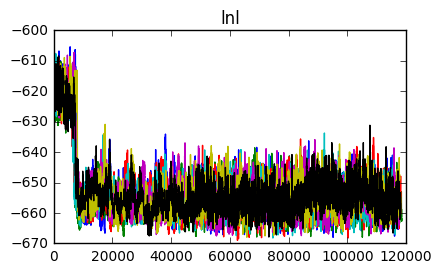

In [7]:
chain = load_chain('cutoff.chain').burnin(3000)
#for key in chain:
#    chain[key] = chain[key][:-8000]
chain.plot('lnl')
keylist = [key for key in chain.join().params() if key[:2] == 'mu']
x = {}
for key in keylist:
    x[key[3:]] = chain.join().best_fit()[key]
print x
chain.join().best_fit()

slope is -4.2399605e-05 \pm 1.3577574e-06
for a difference of $\Delta$lnl 5.00794451367


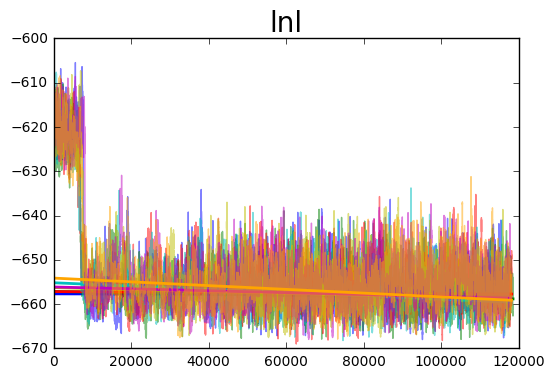

In [8]:
def line(x,a,b):
    return a*x + b
from scipy.optimize import curve_fit
color = ['b','g','r','c','y','m','orange']
title('lnl', fontsize = 20)
for i, source in enumerate(chain):
    x = cumsum(source['weight'])
    y = source['lnl']
    plot(cumsum(source['weight']),source['lnl'], color = color[i], alpha = 0.5)
    popt, pcov = curve_fit(line, x, y, sigma = 1.0/source['weight'])
    plot(x, popt[0]*x + popt[1], linewidth = 2, color = color[i])
print 'slope is %3.8g \pm %3.8g'%(popt[0], sqrt(pcov[0,0]))
print r'for a difference of $\Delta$lnl', popt[0]*x[0] - popt[0]*x[-1]

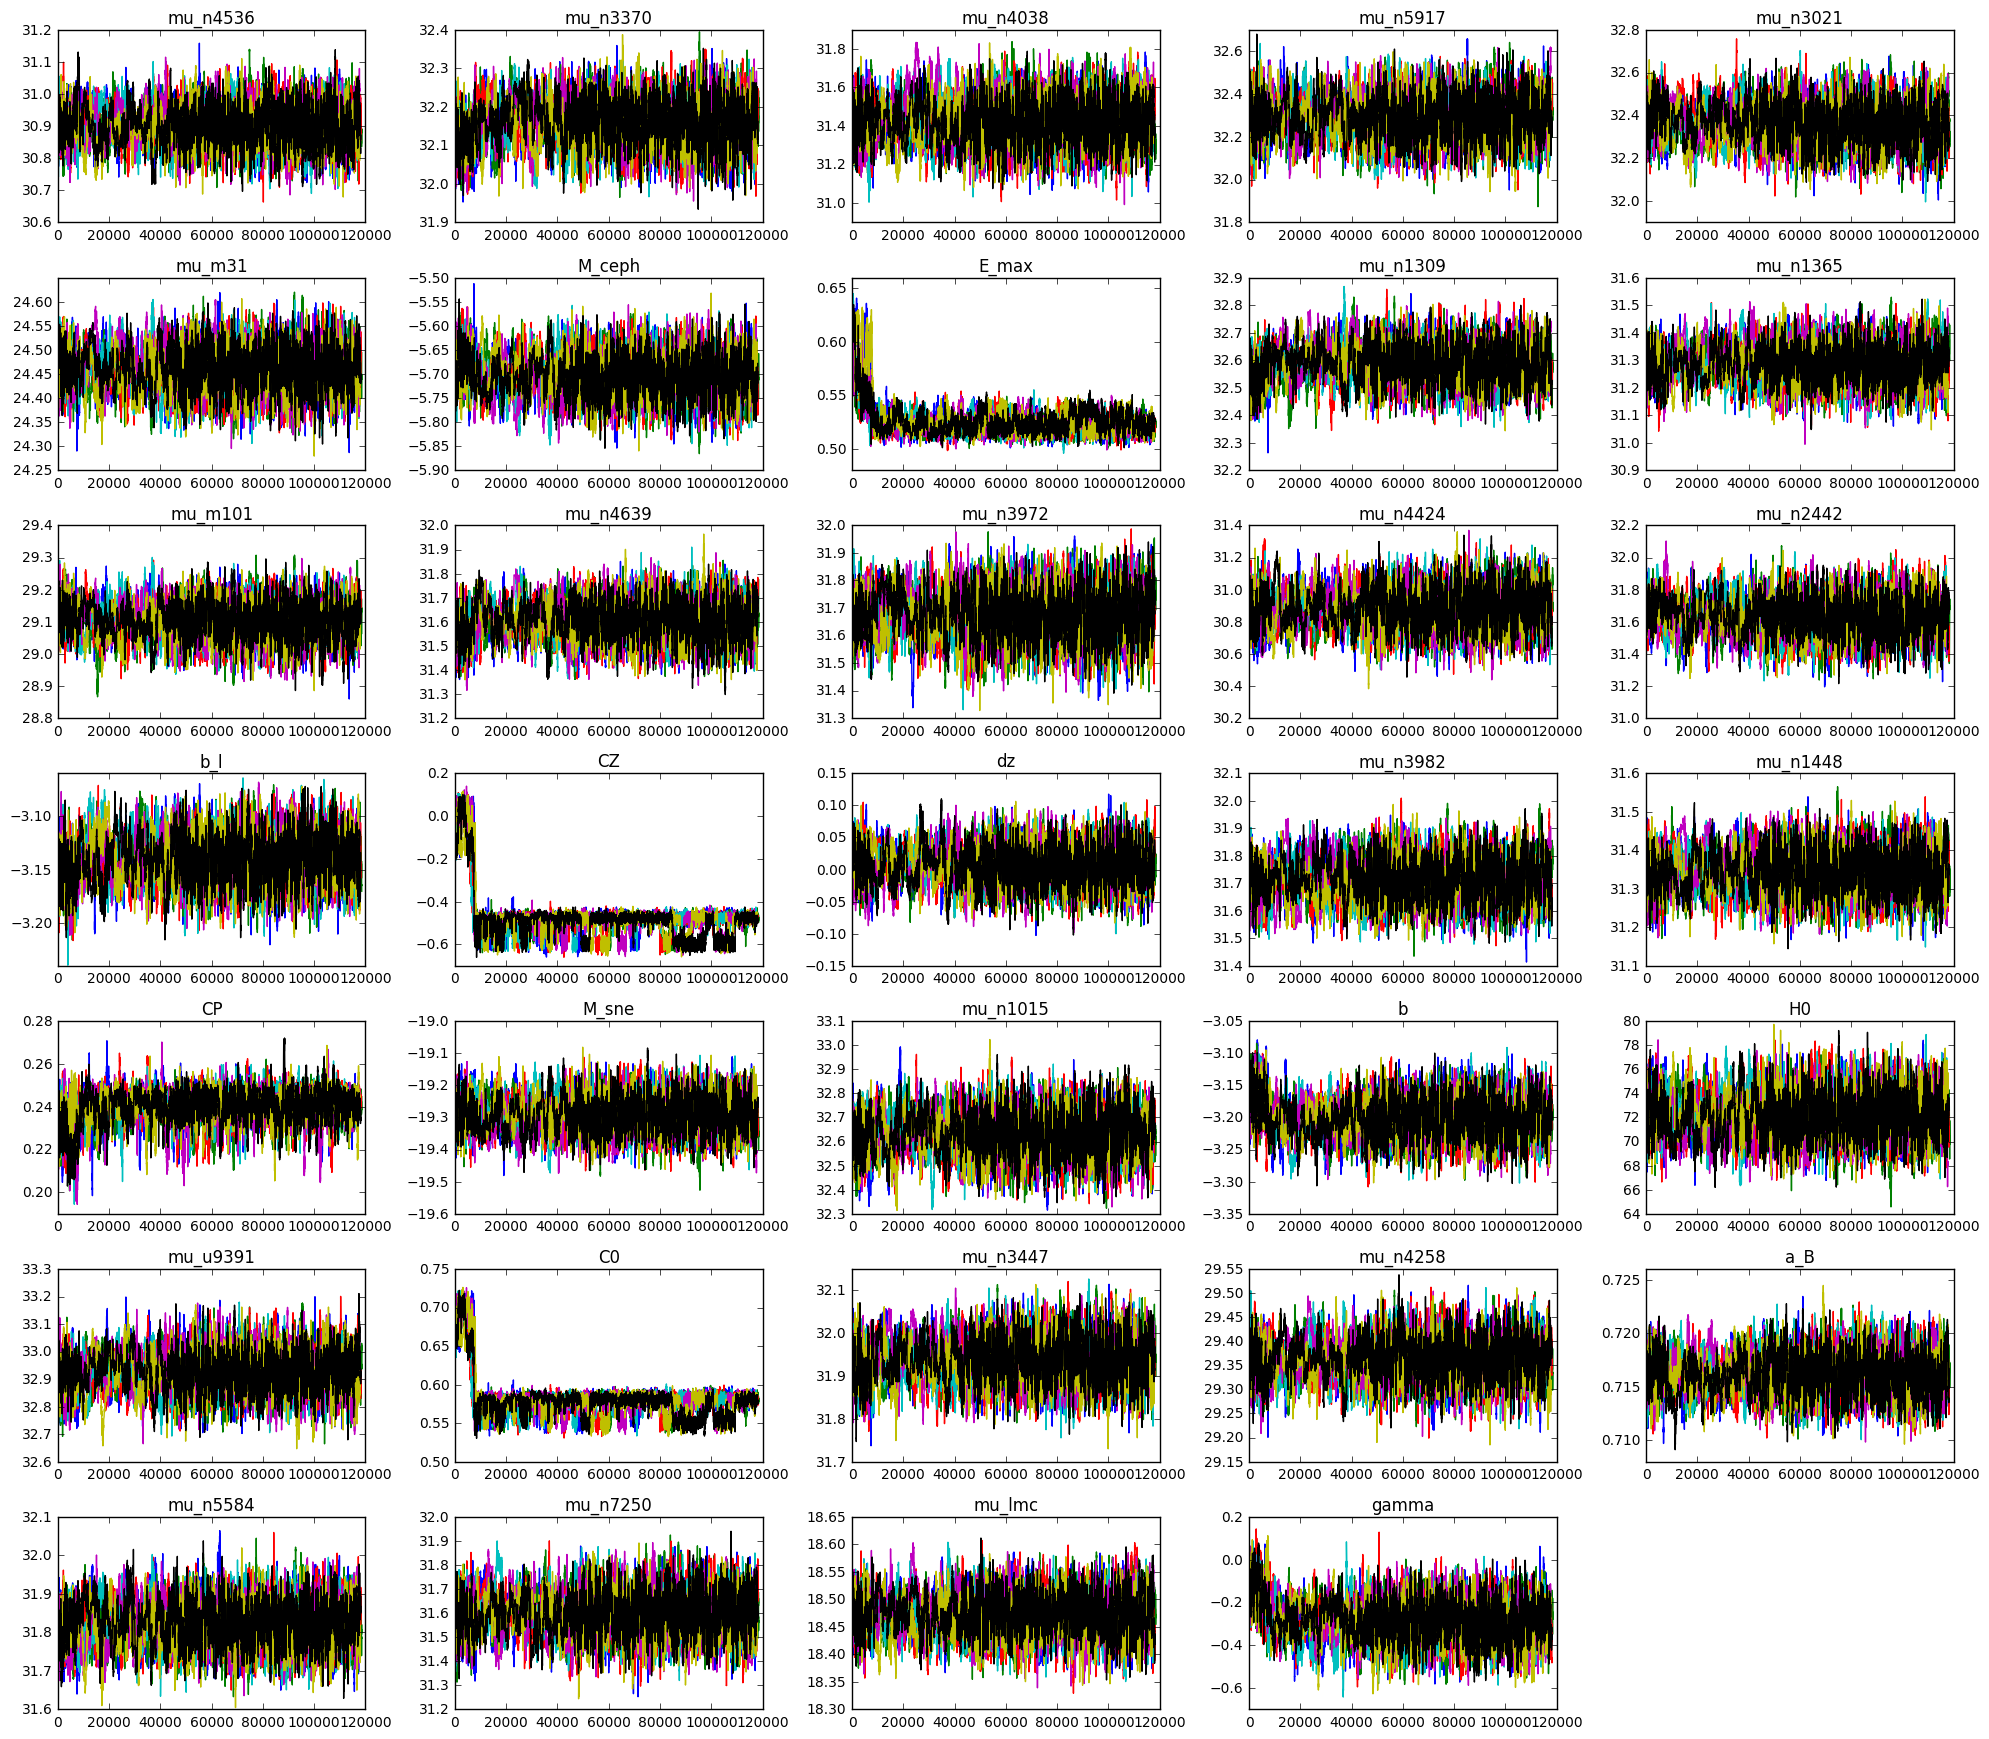

In [9]:
chain.plot()

In [10]:
chain = chain.join()
chain.acceptance()

0.23661976951321481

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


-19.2890752333 0.0516496726629


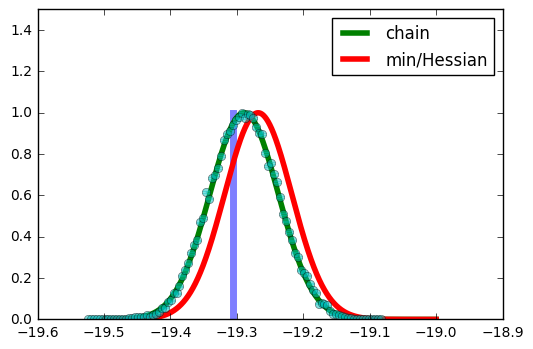

In [11]:
figure()
from scipy.stats import norm
H, xe = histogram(chain['M_sne'],bins=100,weights=chain['weight'],normed=False)
xem = xem=movavg(xe,2)
data = [[x] * weight for x, weight in zip(chain['M_sne'], chain['weight'])]
data =[item for sublist in data for item in sublist]
mu, sigma = norm.fit(data)
x = linspace(-19.5,-19,10000)
y = norm.pdf(x, scale = sigma, loc = mu)

err = [(-0.5 + sqrt(H+0.25)), (0.5 + sqrt(H+0.25))]
H = H
ylim(0,1.5)
print mu, sigma
plot([chain.best_fit()['M_sne'],chain.best_fit()['M_sne']], [0,1], lw = 5, alpha = 0.5)
plot(x, y/max(y), lw = 4, label = 'chain')
y = norm.pdf(x, loc = -19.2679047181, scale = 0.0505989420103)
#y = norm.pdf(x, scale =1.4290595019241095, loc = 73.106690943715904)
plot(x, y/max(y),lw = 4, label = 'min/Hessian')
errorbar(xem, H/max(H), yerr = err/max(H), linewidth = 1, fmt = 'o', alpha = 0.5)

legend()


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


72.2022909902 1.74793649392
1.22318858917


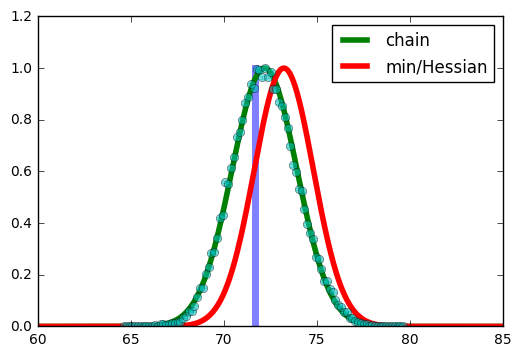

In [12]:

H, xe = histogram(chain['H0'],bins=100,weights=chain['weight'],normed=False)
data = [[x] * weight for x, weight in zip(chain['H0'], chain['weight'])]
data =[item for sublist in data for item in sublist]

xem = xem=movavg(xe,2)
mu, sigma = norm.fit(data)
x = linspace(60,85,10000)
y = norm.pdf(x, scale = sigma, loc = mu)
err = [(-0.5 + sqrt(H+0.25)), (0.5 + sqrt(H+0.25))]
H = H
print mu, sigma
plot([chain.best_fit()['H0'],chain.best_fit()['H0']], [0,1], lw = 5, alpha = 0.5)
plot(x, y/max(y), lw = 4, label = 'chain')
#y = norm.pdf(x, loc = -19.2679047181, scale = 0.0505989420103)
y = norm.pdf(x, scale =1.59, loc = 73.24 )
plot(x, y/max(y),lw = 4, label = 'min/Hessian')
print sigma/1.429
errorbar(xem, H/max(H), yerr = err/max(H), linewidth = 1, fmt = 'o', alpha = 0.5)

legend()


In [13]:
chain.std('a_B')/0.00176

0.99308486495516968

In [14]:
priorR = chain.copy()
for key in priorR.params():
    if key[:2] == 'R_':
        priorR['weight'] /= priorR[key]**2/0.2**2/2 + sqrt(2*pi * 0.2**2)
        
#scatter(priorR['R_n4258'],exp(-(priorR['R_n4258']**2/2/0.05**2))/exp(-(priorR['R_n4258']**2/2/0.1**2))*sqrt(0.1/0.05))
#plot(priorR['R_n4258']**2)

72.2022909902 1.74793649392
1.22318858917


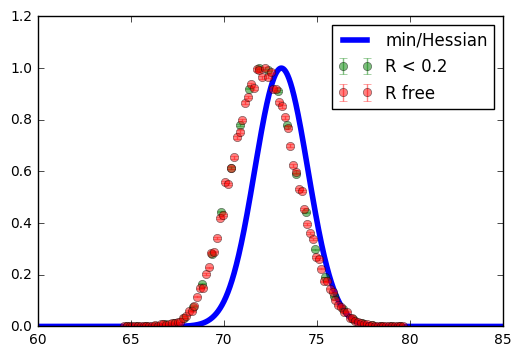

In [15]:

H, xe = histogram(priorR['H0'],bins=30,weights=priorR['weight'],normed=False)
xem = xem=movavg(xe,2)
x = linspace(60,85,10000)
err = [(-0.5 + sqrt(H+0.25)), (0.5 + sqrt(H+0.25))]
H = H
print mu, sigma
#y = norm.pdf(x, loc = -19.2679047181, scale = 0.0505989420103)
y = norm.pdf(x, scale =1.4290595019241095, loc = 73.106690943715904)
plot(x, y/max(y),lw = 4, label = 'min/Hessian')
print sigma/1.429
errorbar(xem, H/max(H), yerr = err/max(H), linewidth = 1, fmt = 'o', alpha = 0.5, label = 'R < 0.2')
H, xe = histogram(chain['H0'],bins=100,weights=chain['weight'],normed=False)
xem = xem=movavg(xe,2)

err = [(-0.5 + sqrt(H+0.25)), (0.5 + sqrt(H+0.25))]
errorbar(xem, H/max(H), yerr = err/max(H), linewidth = 1, fmt = 'o', alpha = 0.5, label = 'R free')


legend()


In [16]:
R_corrections = [(key, chain.mean(key) + 0.39) for key in chain.params() if key[:2] == 'R_']

In [17]:
for key in chain.params():
    if key[:2] == 'R_':
        print key, min(chain[key]), mean(chain[key])

In [18]:
lmc = cepheids[cepheids.Field == 'lmc']

In [19]:
lmc['Intrinsic'] = 0.75 + (log10(lmc.Period)-1) * 0.256 + 0 * (lmc.Z - 8.9)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
lmc.IntColor = (log10(lmc.Period) * (.256 * (lmc.Period > 10) 
                                  )
              +(0.380 * (lmc.Period > 10) 
                +0.501 * (lmc.Period <= 10)
               )
             )

(0.5, 1.1)

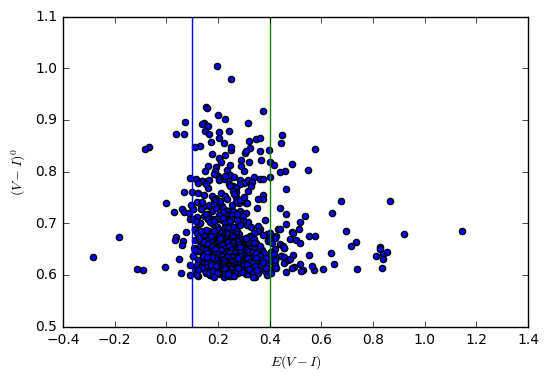

In [21]:
scatter(lmc.VminusI - lmc.Intrinsic, lmc.Intrinsic)
#plot(linspace(0,2), linspace(0,2))
#plot(linspace(0,2), linspace(0,2) - 5 *0.08, color = 'g')
xlabel('$E(V-I)$')
ylabel('$(V-I)^0$')
plot([0.1,0.1],[0.5,1.1])
plot([0.4,0.4],[0.5,1.1])
#xlim(0.2,2.0)
ylim(0.5, 1.1)

In [22]:
from sklearn.cluster import DBSCAN

In [23]:
classifier = DBSCAN(eps = 0.1)

In [24]:
classifier.fit(lmc.loc[:, ['VminusI', 'Intrinsic']])

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
    min_samples=5, n_jobs=1, p=None)

In [25]:
lmc.loc[:,'Class'] = classifier.labels_
classifier.labels_

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/core/indexing.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

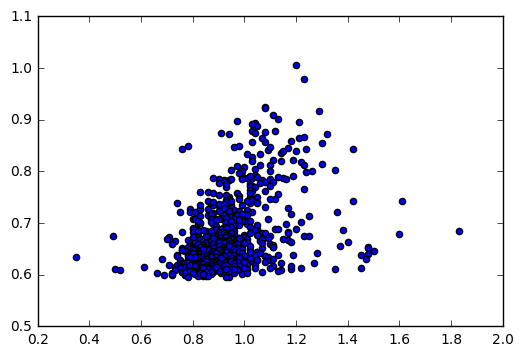

In [26]:
scatter(lmc.VminusI, lmc.Intrinsic)
#scatter(lmc.loc[lmc.Class == 0, 'VminusI'], lmc.loc[lmc.Class == 0, 'Intrinsic'], color = 'g')

In [27]:
param = cs.param_shortcut('start','scale')
class Model(cs.SlikPlugin):
    def __init__(self):

        self.a1 = param(0.1, 0.01)
        self.a2 = param(0.25, 0.01)
        self.b1 = param(0.6, 0.05)
        self.b2 = param(0.6, 0.05)
        
        self.sampler = cs.get_plugin('samplers.metropolis_hastings')(self,
                                                       num_samples = 10000,
                                                       proposal_scale = 1,
                                                       output_file = 'lmc.chain'
                                                                     )
        
        self.data = lmc
        
    def __call__(self):
        return self.like()
    
    def like(self):
        yi = self.data.Intrinsic
        f1 = yi - self.a1 * self.data.VminusI + self.b1
        f2 = yi - self.a2 * self.data.VminusI + self.b2
        chi2 = sum([min((f1)**2,(f2)**2) for f1,f2 in zip(f1,f2)])
        #chi2 = sum(f1**2)
        #print chi2
        return chi2

In [28]:
chain = cs.run_chain(Model)

In [29]:
ml = chain.best_fit()
ml

{'a1': 0.54900444867907172,
 'a2': 0.13628430008199924,
 'b1': -0.2175040475288974,
 'b2': -0.50632796586618956,
 'lnl': 1.0110692646419268,
 'weight': 1.0}

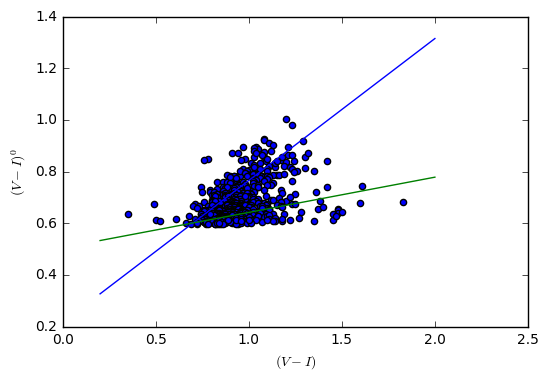

In [30]:
scatter(lmc.VminusI, lmc.Intrinsic)
x = linspace(0.2,2, 100)
plot(x,ml['a1'] * x - ml['b1'])
plot(x,ml['a2'] * x - ml['b2'])

xlabel('$(V-I)$')
ylabel('$(V-I)^0$')

In [31]:
lmc['Cluster'] = zeros(lmc.VminusI.size)
x = lmc.VminusI
r1 = ml['a1'] * lmc.VminusI - ml['b1'] - lmc.Intrinsic
r2 = ml['a2'] * lmc.VminusI - ml['b2'] - lmc.Intrinsic
lmc.loc[r1**2 > r2**2, 'Cluster'] = 1

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


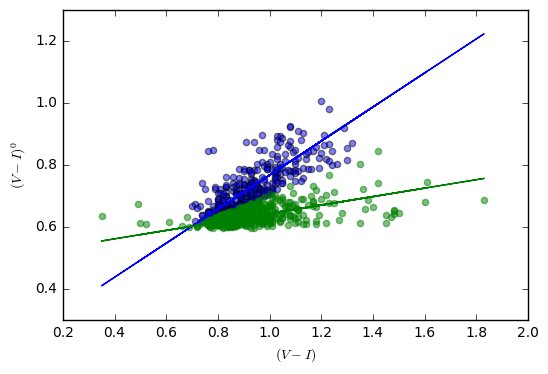

In [32]:
scatter(lmc.loc[lmc.Cluster == 0, 'VminusI'], lmc.loc[lmc.Cluster == 0, 'Intrinsic'], alpha = 0.5)

scatter(lmc.loc[lmc.Cluster == 1, 'VminusI'], lmc.loc[lmc.Cluster == 1, 'Intrinsic'], color = 'g', alpha = 0.5)
plot(x,ml['a1'] * x - ml['b1'], c = 'b')
plot(x,ml['a2'] * x - ml['b2'], c = 'g')
xlabel('$(V-I)$')
ylabel('$(V-I)^0$')

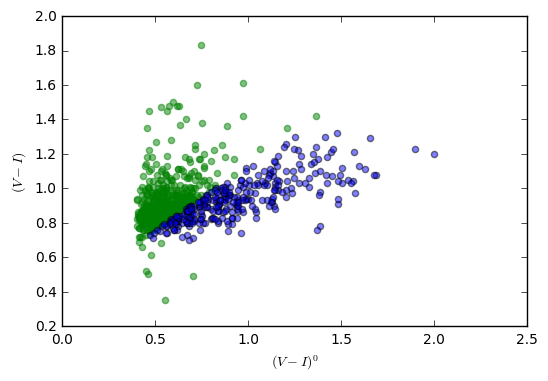

In [33]:
scatter(log10(lmc.loc[lmc.Cluster == 1, 'Period']), lmc.loc[lmc.Cluster == 1, 'VminusI'], color = 'g', alpha = 0.5)
scatter(log10(lmc.loc[lmc.Cluster == 0, 'Period']), lmc.loc[lmc.Cluster == 0, 'VminusI'], alpha = 0.5)
ylabel('$(V-I)$')
xlabel('$(V-I)^0$')